<a href="https://colab.research.google.com/github/PatuanPurba/JSC270_HW2_2025_PPurba/blob/main/Assignment_2_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

income94 = income94.applymap(lambda x: x.strip() if isinstance(x, str) else x) # Strip the unnecessary white space

<ipython-input-2-b6a99e33d999>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  income94 = income94.applymap(lambda x: x.strip() if isinstance(x, str) else x) # Strip the unnecessary white space


# Section II : Data Analysis

## Initial Data Exploration

### 1. Check the data type of each column

In [3]:
income94.dtypes # Checking the data types of every column

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [4]:
print("Unique value of age", np.sort(income94['age'].unique()), end='\n\n\n\n') # We can see that the value is rounded to whole number, so we can treat it as contionus if we only care about it as a whole number. However, not really same as description

print("Unique vlaue of workclass", income94['workclass'].unique(), end='\n\n\n\n') # There is additional value '?' in this column

print("Unique value of fnlwgt", np.sort(income94['fnlwgt'].unique()), end='\n\n\n\n') # Rounded to a whole number, so we can treat it as contionus if we only care about it as a whole number.

print("Unique value of education", np.sort(income94['education'].unique()), end='\n\n\n\n') # Same as the description

print("Unique value of education_num", income94['education_num'].unique(), end='\n\n\n\n') # Not really continous like the description, instead it seems it's an ordinal data based on education column

print("Unique value of marital_status", income94['marital_status'].unique(), end='\n\n\n\n') # Same as the description

print("Unique value of occupation", income94['occupation'].unique(), end='\n\n\n\n') # Same as description

print("Unique value of relationship", income94['relationship'].unique(), end='\n\n\n\n') # Same as description

print("Unique value of race", income94['race'].unique(), end='\n\n\n\n') # Same as description

print("Unique value of sex", income94['sex'].unique(), end='\n\n\n\n') # Same as description

print("Unique value of capital_gain", np.sort(income94['capital_gain'].unique()), end='\n\n\n\n') # Rounded to a whole number, so we can treat it as contionus if we only care about it as a whole number.

print("Unique value of capital_loss", np.sort(income94['capital_loss'].unique()), end='\n\n\n\n') # Rounded to a whole number, so we can treat it as contionus if we only care about it as a whole number.

print("Unique value of hours_per_week", np.sort(income94['hours_per_week'].unique()), end='\n\n\n\n') # Rounded to a whole number, so we can treat it as contionus if we only care about it as a whole number.

print("Unique value of native_country", income94['native_country'].unique(), end='\n\n\n\n') # Same as description with an additional value '?'

print("Unique value of gross_income_group", income94['gross_income_group'].unique(), end='\n\n\n\n') # No description in the website

Unique value of age [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]



Unique vlaue of workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']



Unique value of fnlwgt [  12285   13769   14878 ... 1366120 1455435 1484705]



Unique value of education ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']



Unique value of education_num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]



Unique value of marital_status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']



Unique value of occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-speci

### 2. Check for Missing Values

In [51]:
(income94 == '?').sum() # We know from the website source that the missing values are represented by "?"

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
# Replace the ' ?' in the column into np.nan so future analysis can be done easier
income94.replace({'?': np.nan}, inplace=True)

### 3. Plot Capital Gain and Capital Loss

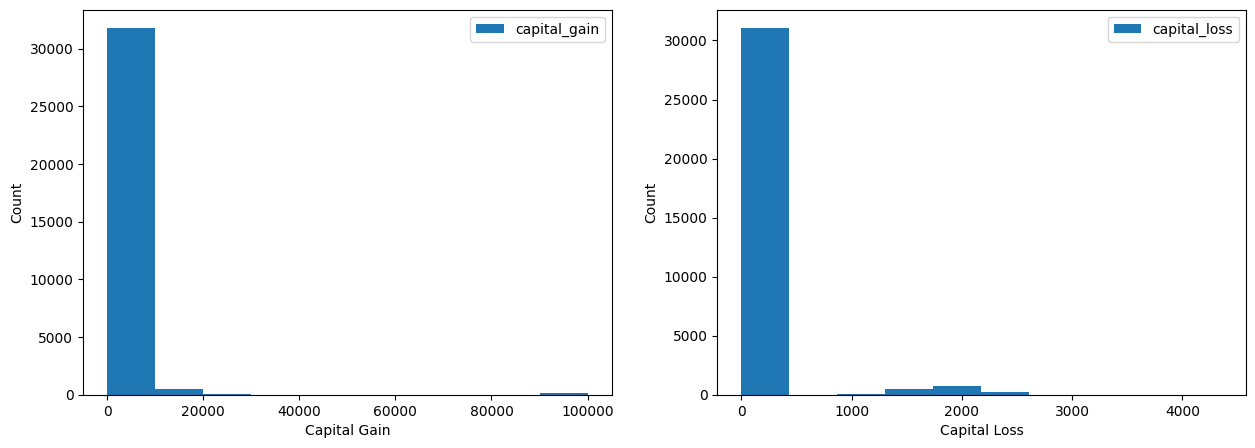

In [8]:
# Plotting the Capital_Gain and Capital_Loss by using histogram
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(income94['capital_gain'], label="capital_gain")
axes[0].set_xlabel('Capital Gain')
axes[0].set_ylabel('Count')
axes[0].legend()

axes[1].hist(income94['capital_loss'], label="capital_loss")
axes[1].set_xlabel('Capital Loss')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.show()

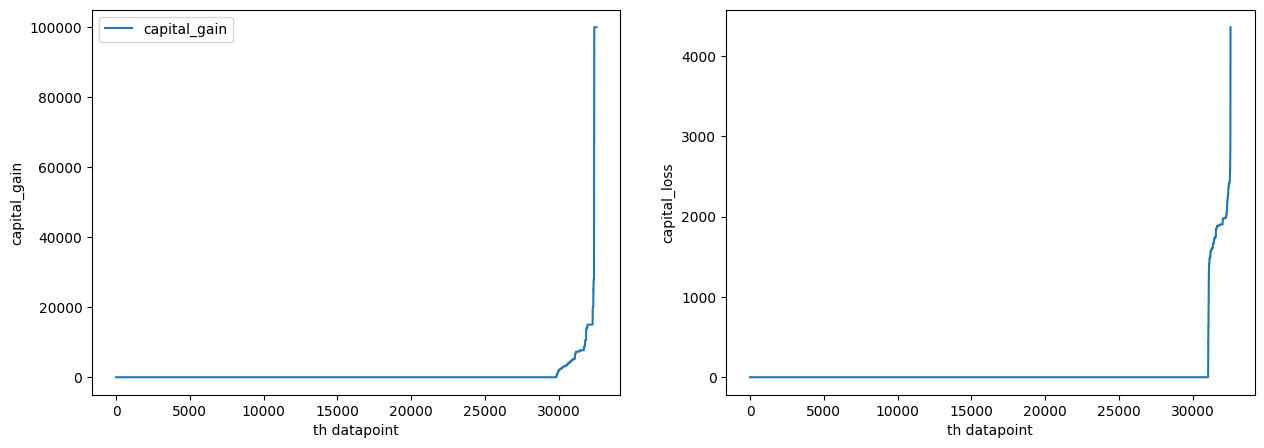

In [9]:
# Further Analysis of the distribution of exact value of capital_gain and capital_loss. Since we don't really care about the index in this analysis, we will sort the dataset.
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(np.sort(income94['capital_gain']), label="capital_gain")
axes[0].set_xlabel('th datapoint')
axes[0].set_ylabel('capital_gain')
axes[0].legend()

axes[1].plot(np.sort(income94['capital_loss']), label="capital_loss")
axes[1].set_xlabel('th datapoint')
axes[1].set_ylabel('capital_loss')

plt.show()

In [10]:
income94['capital_gain'].value_counts() # Find the number of datapoints that have zero value in "capital_gain"

,count
capital_gain,
0,29849
15024,347
7688,284
7298,246
99999,159
...,...
1111,1
2538,1
22040,1


In [11]:
income94['capital_loss'].value_counts() # Find the number of data points that have zero value in "capital_loss"

,count
capital_loss,
0,31042
1902,202
1977,168
1887,159
1848,51
...,...
2080,1
1539,1
1844,1


#### Transform Capital Gain and Capital Loss into categorical data

In [52]:
# Define a function to transform from numerical value into categorical value based on the threshold
def transformation(value, threshold):
  if value == 0:
    return 'Zero'
  elif value < threshold:
    return 'Middle'
  else:
    return 'High'

# The value for threshold is extracted from the plot
income94['capital_gain_category'] = income94['capital_gain'].apply(lambda x: transformation(x, 20000))
income94['capital_loss_category'] = income94['capital_loss'].apply(lambda x: transformation(x, 2000))

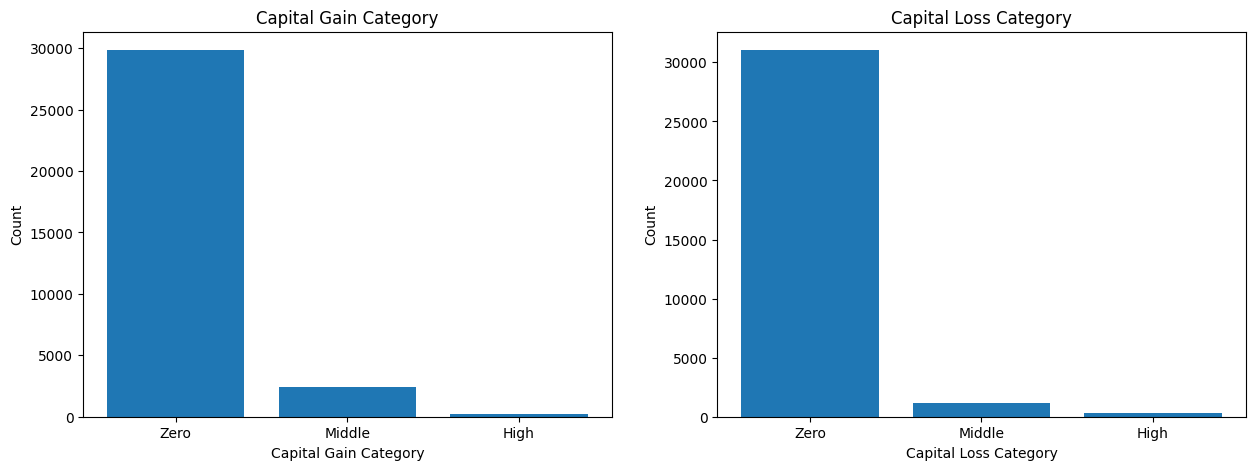

In [13]:
# Plot the new feature (The transformed version of Capital_gain and Capital_loss) by using histogram
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(income94['capital_gain_category'].value_counts().index, income94['capital_gain_category'].value_counts())
axes[0].set_xlabel('Capital Gain Category')
axes[0].set_ylabel('Count')
axes[0].set_title ('Capital Gain Category')

axes[1].bar(income94['capital_loss_category'].value_counts().index, income94['capital_loss_category'].value_counts())
axes[1].set_xlabel('Capital Loss Category')
axes[1].set_ylabel('Count')
axes[1].set_title ('Capital Loss Category')
plt.show()

In [14]:
income94.loc[:, ['capital_gain_category', 'capital_loss_category']].value_counts() # Description of the total numbe rof capital_gain and capital_loss

capital_gain_category  capital_loss_category
Zero                   Zero                     28330
Middle                 Zero                      2459
Zero                   Middle                    1194
                       High                       325
High                   Zero                       253
Name: count, dtype: int64

### 4. Analysis on Final Weight (fnlwgt) column

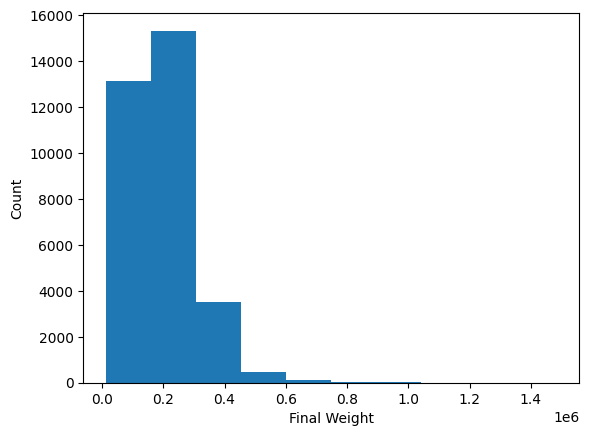

In [53]:
# Plotting the final weight to determine its distribution (Whether it's symmetrical or not)
plt.hist(income94['fnlwgt'])
plt.xlabel('Final Weight')
plt.ylabel('Count')
plt.show()

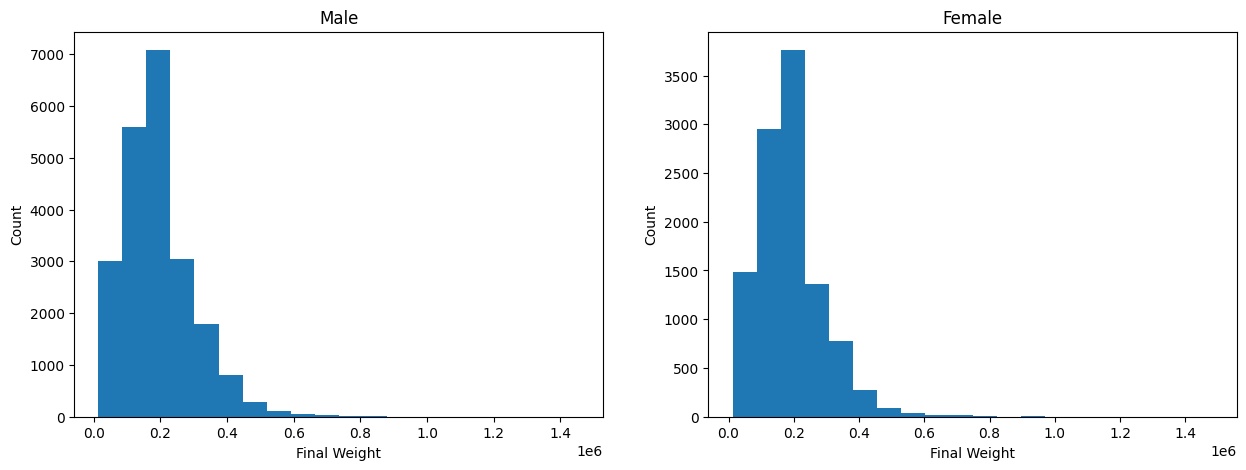

In [16]:
filter = (income94['sex'] == 'Male') # Define a filter to split our dataset into "Male" and "Female"

# Plotting the final weight based on their sex by using histogram. Used to analyze the distribution of each category and see whether has the same pattern
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(income94.loc[filter, 'fnlwgt'], bins=20)
axes[0].set_xlabel('Final Weight')
axes[0].set_ylabel('Count')
axes[0].set_title ('Male')

axes[1].hist(income94.loc[~filter, 'fnlwgt'], bins=20)
axes[1].set_xlabel('Final Weight')
axes[1].set_ylabel('Count')
axes[1].set_title ('Female')
plt.show()

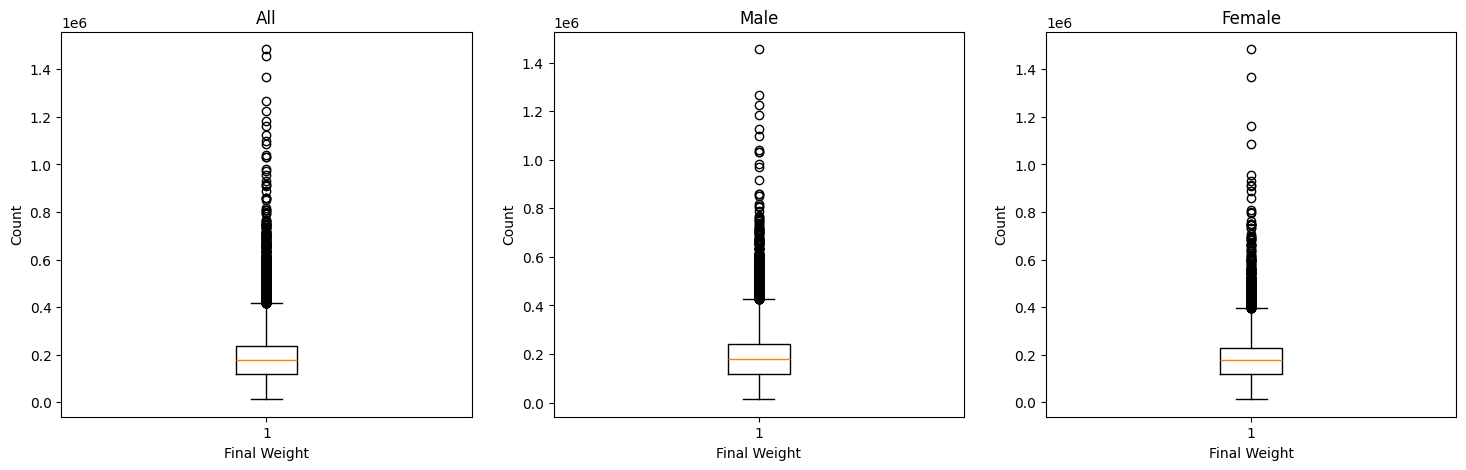

In [17]:
# Plotting the final weight based on their sex by using boxplot to determine a "Natural" outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].boxplot(income94['fnlwgt'])
axes[0].set_xlabel('Final Weight')
axes[0].set_ylabel('Count')
axes[0].set_title ('All')

axes[1].boxplot(income94.loc[filter, 'fnlwgt'])
axes[1].set_xlabel('Final Weight')
axes[1].set_ylabel('Count')
axes[1].set_title ('Male')


axes[2].boxplot(income94.loc[~filter, 'fnlwgt'])
axes[2].set_xlabel('Final Weight')
axes[2].set_ylabel('Count')
axes[2].set_title ('Female')

plt.show()

## Correlation

<Axes: >

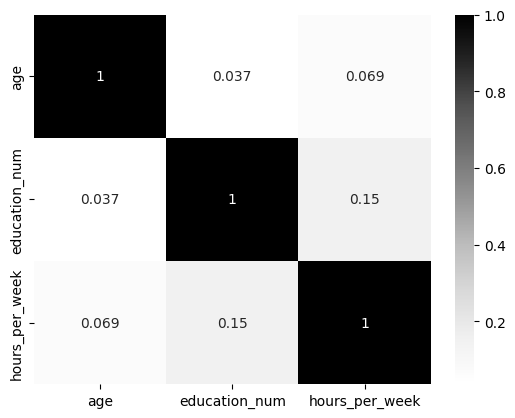

In [54]:
# Table Analysis of correlation by using pre-built function on pandas
interested_cols = ['age', 'education_num', 'hours_per_week']
income94[interested_cols].corr()

# Graph our correlation into a heatmap
sns.heatmap(income94[interested_cols].corr(), annot=True, cmap='Greys')

### Doing Statistical Analysis (t-test) on the pair of variables with coefficient correlation higher than |0.1|

In [19]:
from scipy.stats import t

# A function to find the p-value by using t-test
def find_p_value(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  x_diff = x - x_mean
  y_diff = y - y_mean

  numerator = np.sum(x_diff * y_diff)
  denominator = np.sqrt(np.sum(x_diff ** 2) * np.sum(y_diff ** 2))

  # Compute the correlation between x and y and find the t_value
  correlation = numerator / denominator
  t_value = correlation * np.sqrt(len(x) - 2) / np.sqrt(1 - correlation ** 2)

  # Calculate the p_value
  p_value = 2 * (1 - t.cdf(abs(t_value), df=len(x)-2))
  return correlation, t_value, p_value



# Try to find the pair of variables with absolute value of correlation bigger than 0.1 and do hypothesis testing.
result_dict = {}

for i in range(len(interested_cols)):
  for j in range(i+1, len(interested_cols)):
    correlation, t_value, p_value = find_p_value(income94[interested_cols[i]], income94[interested_cols[j]])
    if abs(correlation) > 0.1:
      result_dict[(interested_cols[i], interested_cols[j])] = {"correlation": correlation, "t_value": t_value, "p_value": p_value}

print(result_dict)

{('education_num', 'hours_per_week'): {'correlation': 0.1481227326229116, 't_value': 27.025551910727152, 'p_value': 0.0}}


### Analyze the Correlation and its Significance between 'education_num' and 'age' clusted by 'sex'

In [55]:
filter = (income94['sex'] == 'Male') # Define a filter to split the dataset between Male and Female

result_dict = {}

# Find the correlation, t_value, and p_value of "Male" and "Female", separately, by using previous defined function
correlation, t_value, p_value = find_p_value(income94.loc[filter, 'education_num'], income94.loc[filter, 'age'])
result_dict['Male'] = {"correlation": correlation, "t_value": t_value, "p_value": p_value}

correlation, t_value, p_value = find_p_value(income94.loc[~filter, 'education_num'], income94.loc[~filter, 'age'])
result_dict['Female'] = {"correlation": correlation, "t_value": t_value, "p_value": p_value}

# Print the result
for key in result_dict:
  print(key)
  for value in result_dict[key]:
    print(value, result_dict[key][value])

  print("\n\n")

Male
correlation 0.06048640919826829
t_value 8.94463039255594
p_value 0.0



Female
correlation -0.01789924393544771
t_value -1.8577700479650685
p_value 0.06322895030880638





In [21]:
income94.loc[:, ['education_num', 'hours_per_week']].cov() # Compute the Covariance Matrix of "Education_num" and "hours_per_week"

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


## Regression

In [45]:
dependent_variable = 'hours_per_week'
independent_variables = ['sex']

# Define a function to transform categorical data into one encoded version (Example: Instead of 1 column has 2 values of Male and Female, we will have 2 column that represents is the datapoints is a Male and is the datapoints is a Female)
# Used so we can use categorical data for our linear regression
def one_hot_nn(df, input_vector):
    for value in input_vector.unique():
        df[value] = ((input_vector == value).to_numpy(dtype='float32'))


# Define a function that can construct our "Independent Variable" data by passing the list of feature we are interested on
def get_exogenous(df_input, independent_variables):
    df = pd.DataFrame()
    for value in independent_variables:
      if not (np.issubdtype(df_input[value].dtype, np.number)):
        one_hot_nn(df, df_input.loc[:, value])

      else:
        df[value] = df_input.loc[:, value]
    result = df.replace({True: 1, False: 0})
    return result.infer_objects(copy=False)


# Make a model of linear regression  with using "Sex" as only independent variable
model_1 = sm.OLS(income94[dependent_variable], sm.add_constant(get_exogenous(income94, independent_variables))).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:56:24   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2795      0.047    556.919      0.0

In [56]:
dependent_variable = 'hours_per_week'
independent_variables = ['sex', 'education_num']

# Make a model of linear regression  with using "Sex" and "Education_num" as independent variables
model_2 = sm.OLS(income94[dependent_variable], sm.add_constant(get_exogenous(income94, independent_variables))).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:56:14   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.5973      0.178    121.279

In [57]:
dependent_variable = 'hours_per_week'
independent_variables = ['sex', 'education_num']

# Transform "gross_income_group" as binary variable on the df
df  = get_exogenous(income94, independent_variables)
df['gross_income_group_>50k'] = (income94['gross_income_group'] == ">50K").to_numpy(dtype='float32')
df['gross_income_group_>50k'].replace({True: 1, False: 0}, inplace=True)

# Make a model of linear regression  with using "Sex", "Education_num", and "gross_income_group" as independent variables
model_3 = sm.OLS(income94[dependent_variable], sm.add_constant(df)).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:57:17   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<ipython-input-57-772fcdf079ca>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gross_income_group_>50k'].replace({True: 1, False: 0}, inplace=True)


In [50]:
# Get the RMSE for each model

RMSE_1 = np.sqrt(np.mean((income94['hours_per_week'] - model_1.predict()) ** 2))
RMSE_2 = np.sqrt(np.mean((income94['hours_per_week'] - model_2.predict()) ** 2))
RMSE_3 = np.sqrt(np.mean((income94['hours_per_week'] - model_3.predict()) ** 2))

print("Model 1: RMSE =", RMSE_1)
print("Model 2: RMSE =", RMSE_2)
print("Model 3: RMSE =", RMSE_3)

Model 1: RMSE = 12.018230134263323
Model 2: RMSE = 11.88353648804017
Model 3: RMSE = 11.750494699340035
